In [ ]:
import sys
print(sys.executable)
import tensorflow as tf
print(tf.__version__)

c:\Users\hysen\AppData\Local\Programs\Python\Python310\python.exe
2.20.0


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import warnings 
#D:\archive
warnings.filterwarnings("ignore")

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [126]:
# Path setup
data_dir = "D:/archive/training"
csv_path = "D:/archive/Brain Tumor.csv"

# Load CSV
df = pd.read_csv(csv_path)
print("Dataset shape:", df.shape)
df.head()
df['Class'].value_counts()

Dataset shape: (3762, 15)


Class
0    2079
1    1683
Name: count, dtype: int64

In [122]:
df['Class'].value_counts()/len(df)*100


Class
0    55.263158
1    44.736842
Name: count, dtype: float64

<Axes: xlabel='Class'>

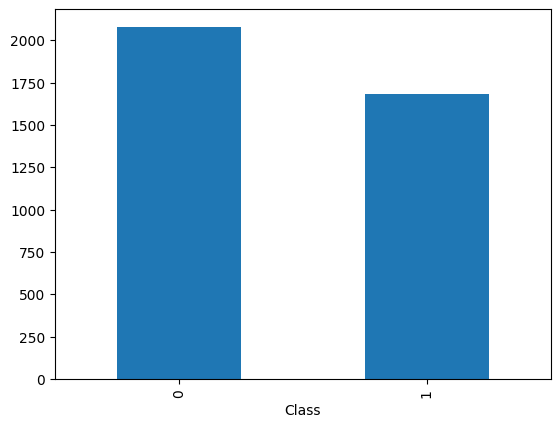

In [25]:
df['Class'].value_counts().plot(kind='bar')

In [127]:
# Görselleri ve etiketleri saklamak için listeler
images = []
labels = []

# Sınıflar
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Tüm klasörlerdeki jpg dosyalarını oku
for cls in classes:
    class_dir = os.path.join(data_dir, cls)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = plt.imread(img_path)  # Görseli oku
        img = np.resize(img, (128,128,3))  # Boyutu standardize et
        images.append(img)
        labels.append(cls)

# NumPy dizisine çevir
X = np.array(images)
y = np.array(labels)

# Etiketleri sayısal değere çevir
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, num_classes=len(classes))


In [78]:
# Görselleri 0-1 aralığına getir
X = X / 255.0

# Eğitim ve doğrulama seti
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')
])

# Model özeti
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [86]:
# To stop when model stops training
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [87]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - accuracy: 0.6218 - loss: 0.4015 - val_accuracy: 0.6990 - val_loss: 0.3297
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 178ms/step - accuracy: 0.7393 - loss: 0.3160 - val_accuracy: 0.7489 - val_loss: 0.2912
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 180ms/step - accuracy: 0.7656 - loss: 0.2765 - val_accuracy: 0.7620 - val_loss: 0.2779
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step - accuracy: 0.7820 - loss: 0.2588 - val_accuracy: 0.7778 - val_loss: 0.2518
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 24s 170ms/step - accuracy: 0.8111 - loss: 0.2275 - val_accuracy: 0.8023 - val_loss: 0.2500
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.8151 - loss: 0.2175 - val_accuracy: 0.7997 - val_loss: 0.2323
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - accuracy: 0.8341 - loss: 0.1944 - val_accuracy: 0.8040 - val_loss: 0.2363
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.8547 - loss: 0

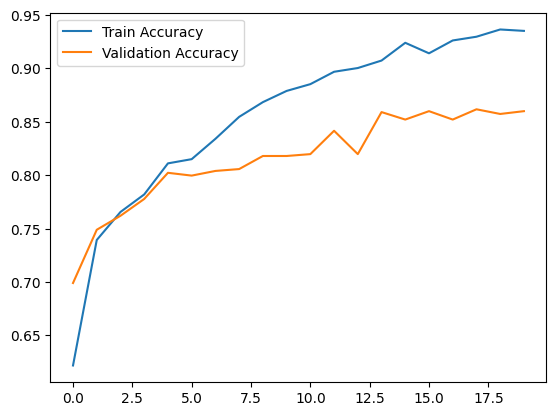

In [88]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [89]:
import random

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


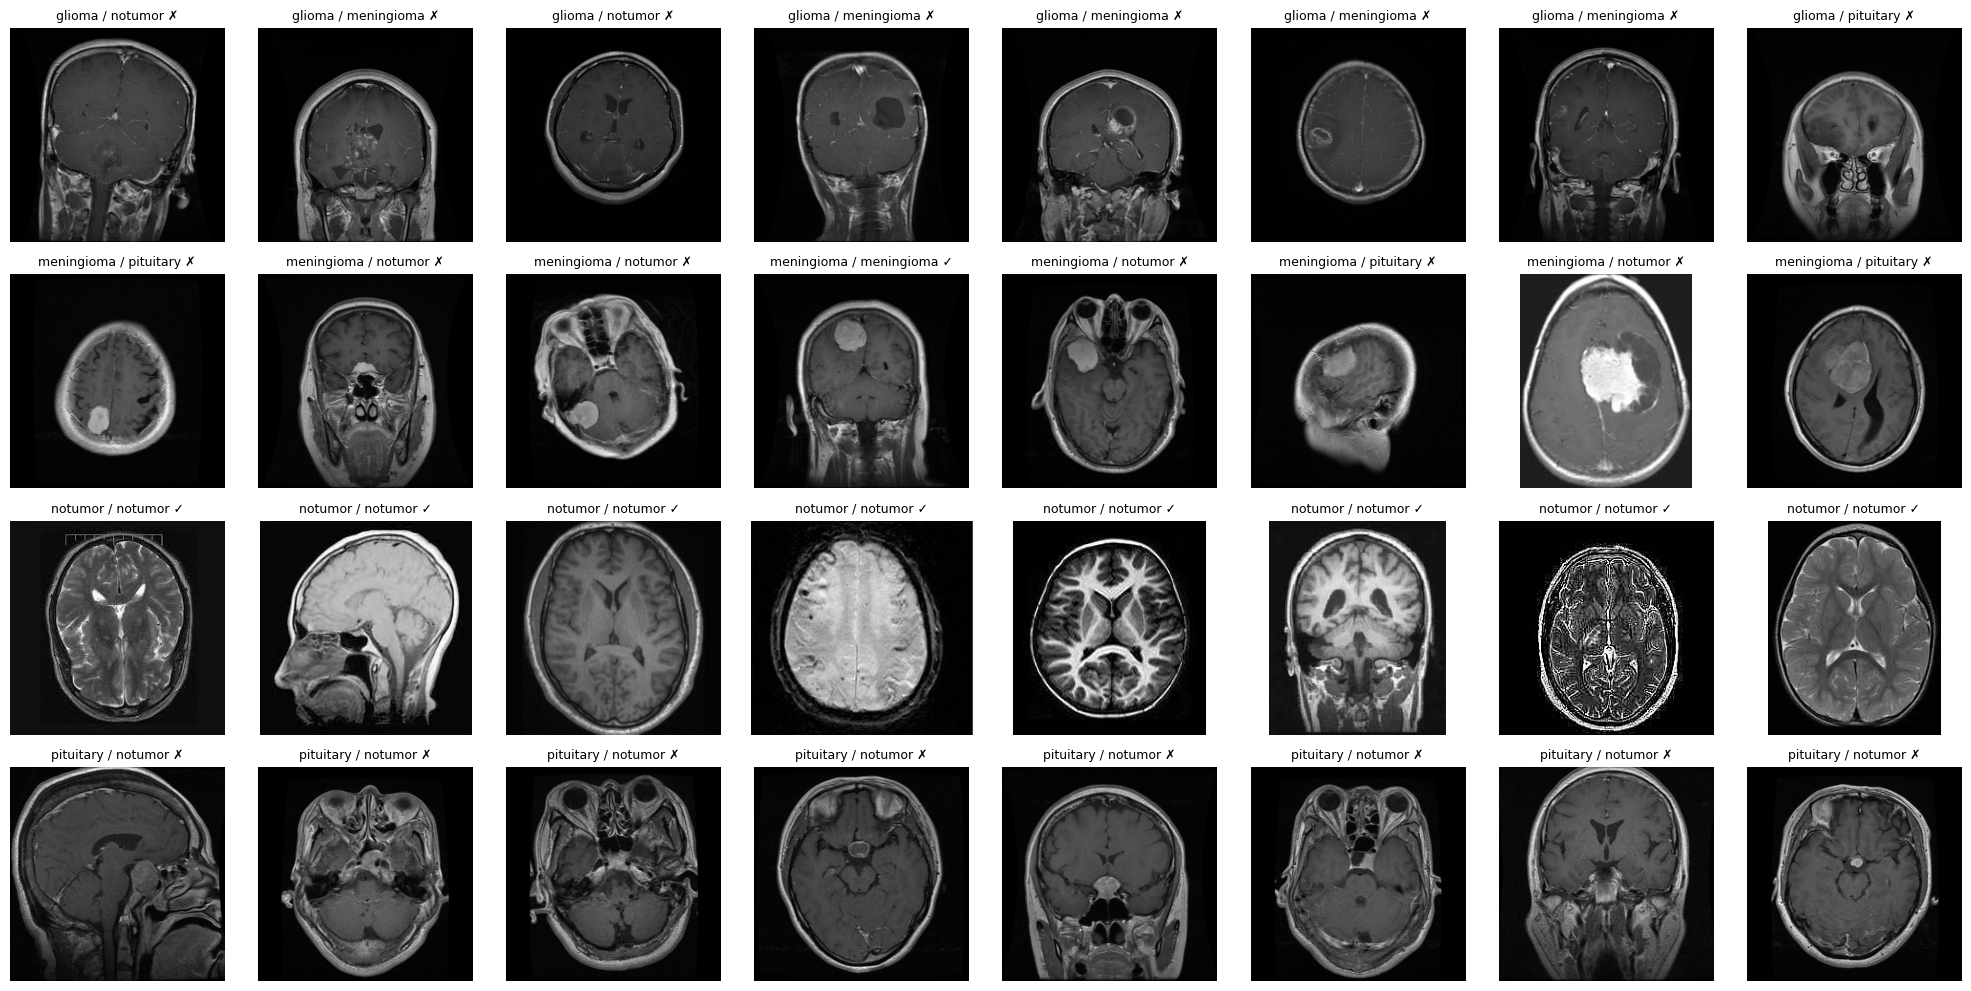

In [ ]:
test_dir = "D:/archive/training"
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Her klasörden 8 rastgele görsel seç ve gerçek sınıfını kaydet
sample_images = []
true_labels = []
num_samples_per_class = 8

for cls in classes:
    cls_folder = os.path.join(test_dir, cls)
    img_files = random.sample(os.listdir(cls_folder), num_samples_per_class)
    for img_file in img_files:
        sample_images.append(os.path.join(cls_folder, img_file))
        true_labels.append(cls)

# Görselleri ön işle ve np.array'e çevir
X_test = []
for img_path in sample_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128,128))
    X_test.append(img_resized / 255.0)

X_test = np.array(X_test)  # Batch oluştur

# Tahmin
predictions = model.predict(X_test)
predicted_classes = [classes[np.argmax(p)] for p in predictions]

# Sonuçları görselle göster
num_total = len(sample_images)
cols = 8
rows = (num_total // cols) + (num_total % cols > 0)

plt.figure(figsize=(20, rows*2.5))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = "✓" if predicted_classes[i] == true_labels[i] else "✗"
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(f"{true_labels[i]} / {predicted_classes[i]} {result}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Test doğruluk: 27.50%


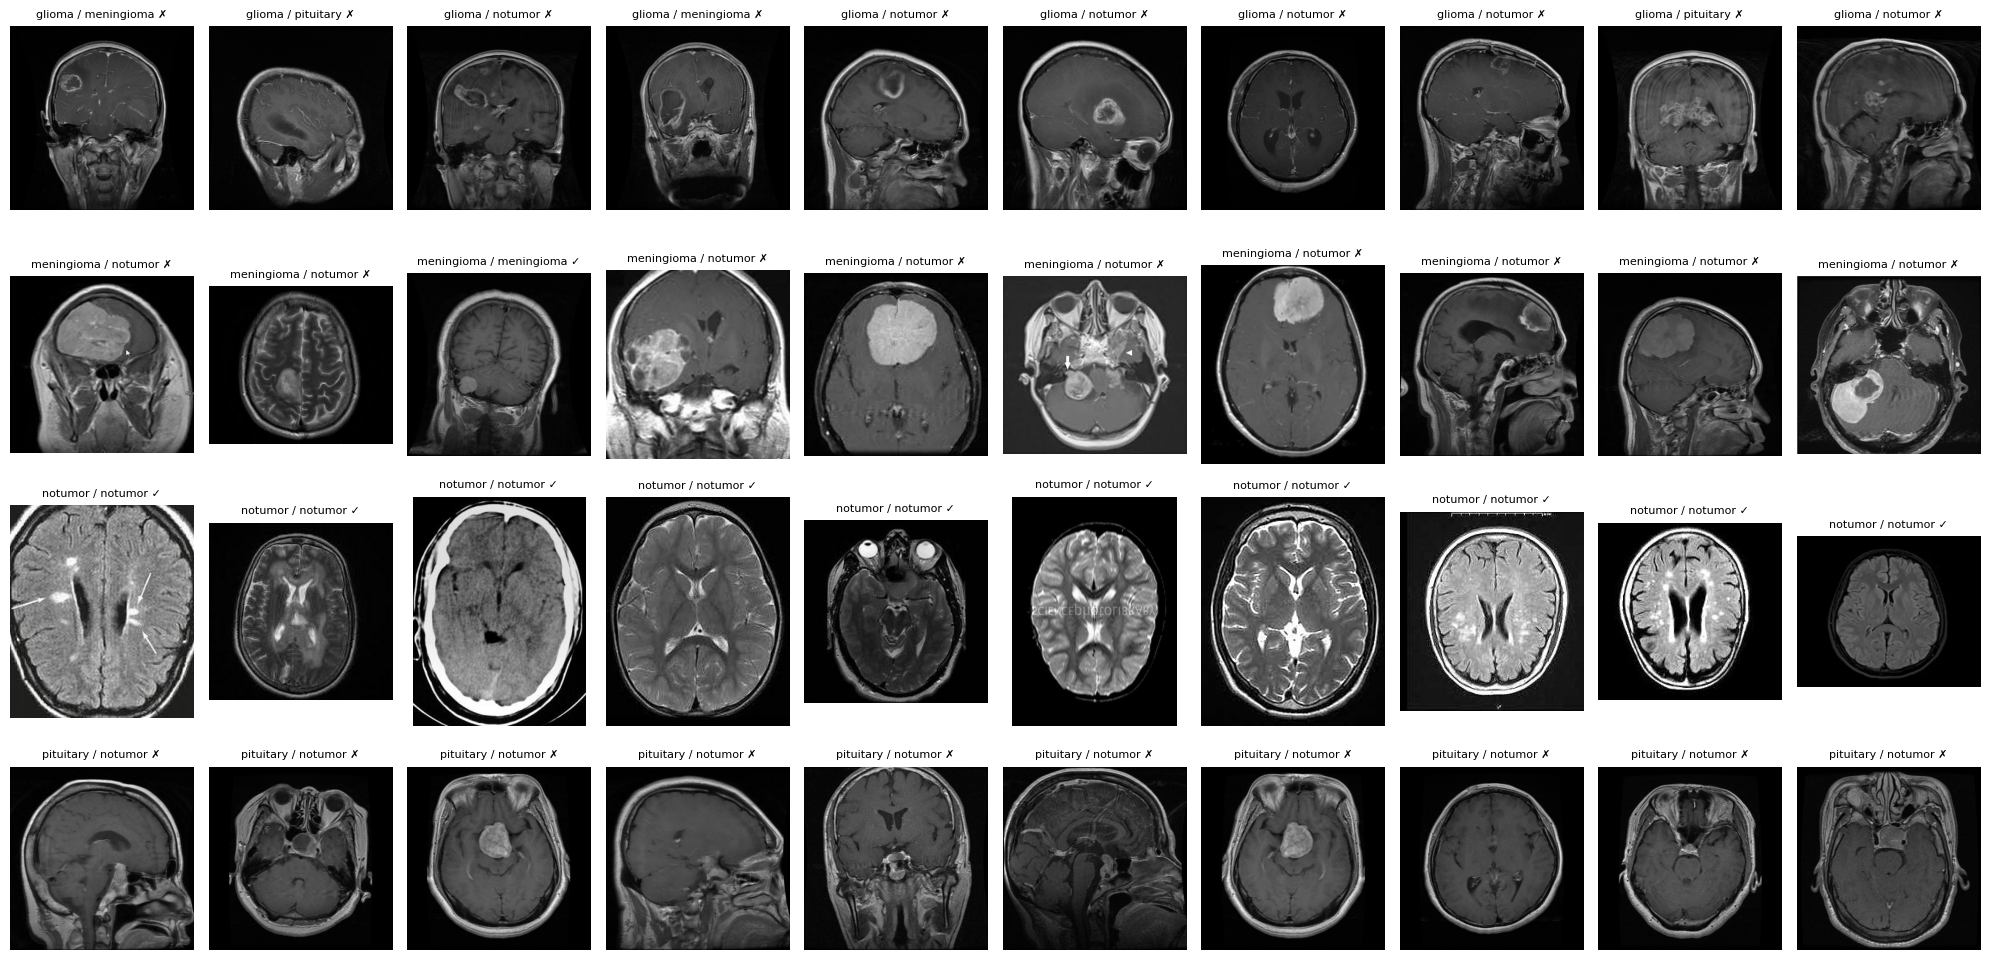

In [120]:
test_dir = "D:/archive/testing"
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Her klasörden 10 rastgele görsel seç ve gerçek sınıfını kaydet
sample_images = []
true_labels = []
num_samples_per_class = 10  # Her klasörden 10 -> Toplam 40 görsel

for cls in classes:
    cls_folder = os.path.join(test_dir, cls)
    img_files = random.sample(os.listdir(cls_folder), num_samples_per_class)
    for img_file in img_files:
        sample_images.append(os.path.join(cls_folder, img_file))
        true_labels.append(cls)

# Görselleri ön işle ve np.array'e çevir
X_test = []
for img_path in sample_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128,128))
    X_test.append(img_resized / 255.0)

X_test = np.array(X_test)  # Batch oluştur

# Tahmin
predictions = model.predict(X_test)
predicted_classes = [classes[np.argmax(p)] for p in predictions]

# Test doğruluğunu hesapla
accuracy = sum([predicted_classes[i] == true_labels[i] for i in range(len(true_labels))]) / len(true_labels)
print(f"Test doğruluk: {accuracy*100:.2f}%")

# Sonuçları görselle göster
num_total = len(sample_images)
cols = 10  # Her satırda 10 görsel
rows = (num_total // cols) + (num_total % cols > 0)

plt.figure(figsize=(20, rows*2.5))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = "✓" if predicted_classes[i] == true_labels[i] else "✗"
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(f"{true_labels[i]} / {predicted_classes[i]} {result}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()